In [2]:
import sys
import torch.nn as nn
import torch
import warnings
sys.path.append('/home/jovyan/work/d2l_solutions/notebooks/exercises/d2l_utils/')
import d2l
warnings.filterwarnings("ignore")


def init_cnn(module):
    if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)


class ParamLeNet(d2l.Classifier):
    def __init__(self, convs, linears, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        layers = []
        for conv in convs:
            layers.append(nn.LazyConv2d(conv[0], kernel_size=conv[1],
                                        padding=conv[2]))
            layers.append(nn.ReLU())
            layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        layers.append(nn.Flatten())
        for linear in linears:
            layers.append(nn.LazyLinear(linear))
            layers.append(nn.ReLU())
        layers.append(nn.LazyLinear(num_classes))
        self.net = nn.Sequential(*layers)

## 2.5 Adjust the learning rates and other training details (e.g., initialization and number of epochs).

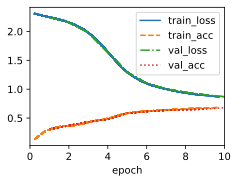

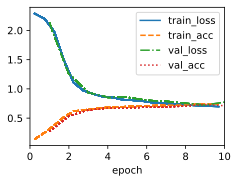

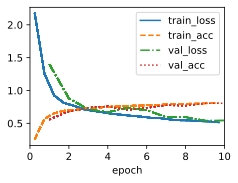

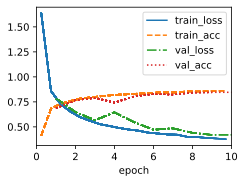

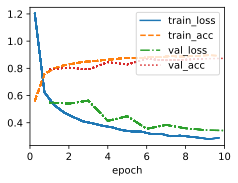

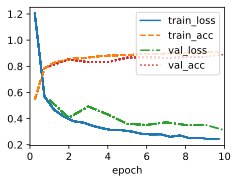

In [4]:
data = d2l.FashionMNIST(batch_size=256)
lr_list = [0.001,0.003,0.01,0.03,0.1,0.3]
acc_list = []
for lr in lr_list:
    hparams = {'convs':[[6,5,2],[16,5,0]], 'linears':[120,84],'lr':lr}
    model = ParamLeNet(**hparams)
    model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
    trainer = d2l.Trainer(max_epochs=10)
    trainer.fit(model, data)
    y_hat = model(data.val.data.type(torch.float32).unsqueeze(dim=1))
    acc_list.append(model.accuracy(y_hat,data.val.targets).item())

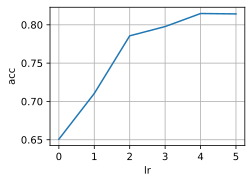

In [5]:
d2l.plot(list(range(len(acc_list))),acc_list,'lr','acc')

# 3. Try out the improved network on the original MNIST dataset.

0.8565999865531921

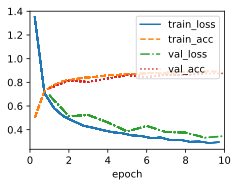

In [9]:
hparams = {'convs':[[16,5,2],[32,5,0]], 'linears':[64,32]}
model = ParamLeNet(**hparams)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)
y_hat = model(data.val.data.type(torch.float32).unsqueeze(dim=1))
model.accuracy(y_hat,data.val.targets).item()

# 4. Display the activations of the first and second layer of LeNet for different inputs (e.g., sweaters and coats).

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

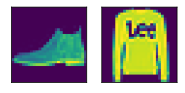

In [34]:
pic = data.val.data[:2,:].type(torch.float32).unsqueeze(dim=1)
d2l.show_images(pic.squeeze(),1,2)

In [36]:
model.net[0](pic).shape

torch.Size([2, 16, 28, 28])

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

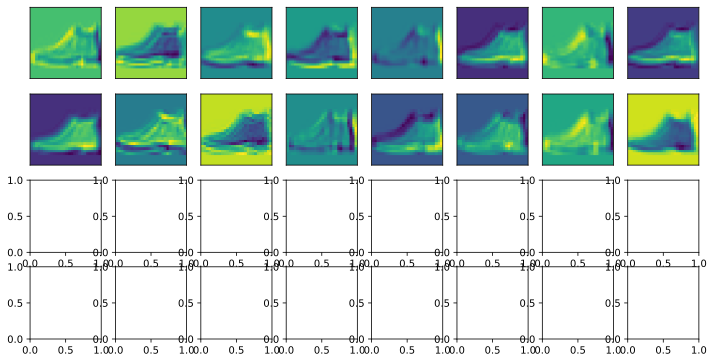

In [37]:
d2l.show_images(model.net[0](pic).squeeze().detach().numpy().rehshape,4,8)

# 5. What happens to the activations when you feed significantly different images into the network (e.g., cats, cars, or even random noise)?